In [183]:
import math
import pandas as pd
import numpy as np
from numpy import linalg as la
from scipy import optimize as opt
import matplotlib.pyplot as plt

In [145]:
bond_data = pd.read_excel('hw_2_data.xlsx')
bond_data

,Maturity,Coupon,Price
0,2019-08-15,0.08125,102.79
1,2020-02-15,0.08500,105.88
2,2020-08-15,0.08750,109.10
3,2021-02-15,0.07875,110.43
4,2021-08-15,0.08125,113.57
5,2022-02-15,0.02500,100.16
6,2022-08-15,0.07250,115.87
7,2023-02-15,0.07125,117.60
8,2023-08-15,0.06250,115.97
9,2024-02-15,0.02750,101.34


# Question 1, calculate yield

we know that if yield is $r$, then the bond price is 
$$\textbf{price} = \frac{c}{r} + (1-\frac{c}{r})(1 + \frac{r}{k})^{-kN},$$
assuming face value = $1, where here k = 2.

In [146]:
days_to_mature = np.zeros(len(bond_data))

for i in range(len(bond_data)):
    days_to_mature[i] = (bond_data["Maturity"][i]-pd.to_datetime("2/15/2019")).days


days_to_mature = np.round(days_to_mature*2/365)/2

bond_data["N"] = days_to_mature

bond_data

,Maturity,Coupon,Price,N
0,2019-08-15,0.08125,102.79,0.5
1,2020-02-15,0.08500,105.88,1.0
2,2020-08-15,0.08750,109.10,1.5
3,2021-02-15,0.07875,110.43,2.0
4,2021-08-15,0.08125,113.57,2.5
5,2022-02-15,0.02500,100.16,3.0
6,2022-08-15,0.07250,115.87,3.5
7,2023-02-15,0.07125,117.60,4.0
8,2023-08-15,0.06250,115.97,4.5
9,2024-02-15,0.02750,101.34,5.0


In [147]:
def price_func(r, args):
    # define a function whose input is the yield r
    # the root to the function is the correct yield s.t. the bond is correctly priced
    c, k, N, price = args
    return (c/r + (1-c/r)*(1+r/k)**(-k*N))*100 - price

yields_to_mature = np.zeros(len(bond_data))

# we use a solver to solve for the yield that correctly prices each bond
for i in range(len(bond_data)):
    yields_to_mature[i] = opt.fsolve(price_func, 0.03, args = [bond_data["Coupon"][i], 2, bond_data["N"][i], bond_data["Price"][i]])[0]


bond_data["Yield"] = yields_to_mature

bond_data["Yield_semi"] = yields_to_mature/2

bond_data

,Maturity,Coupon,Price,N,Yield,Yield_semi
0,2019-08-15,0.08125,102.79,0.5,0.024759,0.012380
1,2020-02-15,0.08500,105.88,1.0,0.025091,0.012546
2,2020-08-15,0.08750,109.10,1.5,0.025292,0.012646
3,2021-02-15,0.07875,110.43,2.0,0.024963,0.012481
4,2021-08-15,0.08125,113.57,2.5,0.024924,0.012462
5,2022-02-15,0.02500,100.16,3.0,0.024444,0.012222
6,2022-08-15,0.07250,115.87,3.5,0.024874,0.012437
7,2023-02-15,0.07125,117.60,4.0,0.024763,0.012382
8,2023-08-15,0.06250,115.97,4.5,0.024777,0.012388
9,2024-02-15,0.02750,101.34,5.0,0.024635,0.012318


# Question 2 Calculate MacD

In [148]:
# function to calculate MacD for a bond
def get_MacD(N, r, k, c_i):
    # N is the number of years
    # r is yield
    # k is the number of payments per year
    # c_i is an array with k*N elements, payment at each period
    
    # the periods are given by np.linspace(1/k, N, kN)
    
    periods = np.linspace(1/k, N, int(np.round(k*N)))
    # a total of kN payments
    
    numer = 0
    denom = 0

    for i in range(len(periods)):
        numer += periods[i] * c_i[i] * (1+r/k)**(-(i+1))
        denom += c_i[i] * (1+r/k)**(-(i+1))

    return numer/denom


def generate_payments(c, k, N):
    # this function returns an array which is the payments for a bond till maturity
    # c is coupon rate per year
    # k is periods of compounding per year
    # N is years to maturity
    # assuming face value $100
    
    payments = np.ones(int(np.round(k*N)))*(c/k)*100
    payments[-1] += 100
    return payments


MacD = np.zeros(len(bond_data))
for i in range(len(bond_data)):
    payments = generate_payments(bond_data["Coupon"][i], 2, bond_data["N"][i])
    MacD[i] = get_MacD(bond_data["N"][i], bond_data["Yield"][i], 2, payments)
    
bond_data["MacD"] = MacD
bond_data


,Maturity,Coupon,Price,N,Yield,Yield_semi,MacD
0,2019-08-15,0.08125,102.79,0.5,0.024759,0.012380,0.500000
1,2020-02-15,0.08500,105.88,1.0,0.025091,0.012546,0.980179
2,2020-08-15,0.08750,109.10,1.5,0.025292,0.012646,1.440847
3,2021-02-15,0.07875,110.43,2.0,0.024963,0.012481,1.895216
4,2021-08-15,0.08125,113.57,2.5,0.024924,0.012462,2.325508
5,2022-02-15,0.02500,100.16,3.0,0.024444,0.012222,2.909005
6,2022-08-15,0.07250,115.87,3.5,0.024874,0.012437,3.182104
7,2023-02-15,0.07125,117.60,4.0,0.024763,0.012382,3.591172
8,2023-08-15,0.06250,115.97,4.5,0.024777,0.012388,4.034328
9,2024-02-15,0.02750,101.34,5.0,0.024635,0.012318,4.708010


# Calculate ModD

We know that 
$$ \textbf{ModD} = \frac{\textbf{MacD}}{1+\frac{r}{k}},$$
where $r$ is annualized yield, $k$ is periods of compounding per year.

In [149]:
bond_data["ModD"] = bond_data["MacD"]/(1+bond_data["Yield"]/2)
bond_data

,Maturity,Coupon,Price,N,Yield,Yield_semi,MacD,ModD
0,2019-08-15,0.08125,102.79,0.5,0.024759,0.012380,0.500000,0.493886
1,2020-02-15,0.08500,105.88,1.0,0.025091,0.012546,0.980179,0.968034
2,2020-08-15,0.08750,109.10,1.5,0.025292,0.012646,1.440847,1.422853
3,2021-02-15,0.07875,110.43,2.0,0.024963,0.012481,1.895216,1.871853
4,2021-08-15,0.08125,113.57,2.5,0.024924,0.012462,2.325508,2.296884
5,2022-02-15,0.02500,100.16,3.0,0.024444,0.012222,2.909005,2.873881
6,2022-08-15,0.07250,115.87,3.5,0.024874,0.012437,3.182104,3.143015
7,2023-02-15,0.07125,117.60,4.0,0.024763,0.012382,3.591172,3.547251
8,2023-08-15,0.06250,115.97,4.5,0.024777,0.012388,4.034328,3.984960
9,2024-02-15,0.02750,101.34,5.0,0.024635,0.012318,4.708010,4.650725


# Question 4 Compute the price of bonds if yield goes up or down by 0.5%

We know the formula for pricing a bond is 
$$\textbf{price} = \frac{c}{r} + (1-\frac{c}{r})(1+\frac{r}{k})^{-kN},$$
where we assume face value is $1.

In [150]:
def get_bond_price(c, r, k, N):
    return 100 * (c/r + (1 - c/r) * (1+r/k)**(-k*N))

bond_data["pr_r_up_0.005"] = get_bond_price(bond_data["Coupon"], bond_data["Yield"]+0.005, 2, bond_data["N"])
bond_data["pr_r_down_0.005"] = get_bond_price(bond_data["Coupon"], bond_data["Yield"]-0.005, 2, bond_data["N"])
bond_data

,Maturity,Coupon,Price,N,Yield,Yield_semi,MacD,ModD,pr_r_up_0.005,pr_r_down_0.005
0,2019-08-15,0.08125,102.79,0.5,0.024759,0.012380,0.500000,0.493886,102.536793,103.044461
1,2020-02-15,0.08500,105.88,1.0,0.025091,0.012546,0.980179,0.968034,105.369402,106.394369
2,2020-08-15,0.08750,109.10,1.5,0.025292,0.012646,1.440847,1.422853,108.327598,109.879962
3,2021-02-15,0.07875,110.43,2.0,0.024963,0.012481,1.895216,1.871853,109.402689,111.469837
4,2021-08-15,0.08125,113.57,2.5,0.024924,0.012462,2.325508,2.296884,112.275083,114.883761
5,2022-02-15,0.02500,100.16,3.0,0.024444,0.012222,2.909005,2.873881,98.732993,101.611633
6,2022-08-15,0.07250,115.87,3.5,0.024874,0.012437,3.182104,3.143015,114.066361,117.708426
7,2023-02-15,0.07125,117.60,4.0,0.024763,0.012382,3.591172,3.547251,115.536347,119.708274
8,2023-08-15,0.06250,115.97,4.5,0.024777,0.012388,4.034328,3.984960,113.686527,118.308373
9,2024-02-15,0.02750,101.34,5.0,0.024635,0.012318,4.708010,4.650725,99.014531,103.728188


# Question 5

In [155]:
bond_display = bond_data[["Price", "N", "Yield", "MacD", "ModD"]].copy()
bond_display["price_change_r_up"] = bond_data["pr_r_up_0.005"] - bond_data["Price"]
bond_display["price_change_r_down"] = bond_data["pr_r_down_0.005"] - bond_data["Price"]
bond_display["ModD$\cdot \Delta_r$"] = bond_data["ModD"]*0.5
bond_display

,Price,N,Yield,MacD,ModD,price_change_r_up,price_change_r_down,ModD$\cdot \Delta_r$
0,102.79,0.5,0.024759,0.500000,0.493886,-0.253207,0.254461,0.246943
1,105.88,1.0,0.025091,0.980179,0.968034,-0.510598,0.514369,0.484017
2,109.10,1.5,0.025292,1.440847,1.422853,-0.772402,0.779962,0.711427
3,110.43,2.0,0.024963,1.895216,1.871853,-1.027311,1.039837,0.935926
4,113.57,2.5,0.024924,2.325508,2.296884,-1.294917,1.313761,1.148442
5,100.16,3.0,0.024444,2.909005,2.873881,-1.427007,1.451633,1.436941
6,115.87,3.5,0.024874,3.182104,3.143015,-1.803639,1.838426,1.571507
7,117.60,4.0,0.024763,3.591172,3.547251,-2.063653,2.108274,1.773625
8,115.97,4.5,0.024777,4.034328,3.984960,-2.283473,2.338373,1.992480
9,101.34,5.0,0.024635,4.708010,4.650725,-2.325469,2.388188,2.325362


# Question 6

# Question 7

# Question 8
Assume today is 4/15/2019, compute the clean and dirty price.
Suppose we use the 30/360 convention. Obviously every bond will pay coupon on 8/15/2019.
Each coupon period is 6 months, i.e. 180 days.
2 months (60 days) have passed

In [163]:
bond_dirty = bond_data[["Maturity", "Coupon", "Price", "N", "Yield"]].copy()
   
bond_dirty["fraction"] = 60/180

bond_dirty["dirty_price"] = bond_dirty["Price"]*(1+ bond_dirty["Yield"]/2)**bond_dirty["fraction"]

bond_dirty


,Maturity,Coupon,Price,N,Yield,fraction,dirty_price
0,2019-08-15,0.08125,102.79,0.5,0.024759,0.333333,103.212428
1,2020-02-15,0.08500,105.88,1.0,0.025091,0.333333,106.320937
2,2020-08-15,0.08750,109.10,1.5,0.025292,0.333333,109.557977
3,2021-02-15,0.07875,110.43,2.0,0.024963,0.333333,110.887539
4,2021-08-15,0.08125,113.57,2.5,0.024924,0.333333,114.039822
5,2022-02-15,0.02500,100.16,3.0,0.024444,0.333333,100.566394
6,2022-08-15,0.07250,115.87,3.5,0.024874,0.333333,116.348373
7,2023-02-15,0.07125,117.60,4.0,0.024763,0.333333,118.083370
8,2023-08-15,0.06250,115.97,4.5,0.024777,0.333333,116.446930
9,2024-02-15,0.02750,101.34,5.0,0.024635,0.333333,101.754390


Obviously clean price is equal to the price quoted on 2/15/2019, assuming yield not changed.

# Question 9 Bootstrap zero curve
Up to 8/15/2029.

In [217]:
bond_bootstrap = bond_data[["Maturity", "Coupon", "Price", "N"]].copy()
bond_bootstrap = bond_bootstrap[bond_bootstrap["Maturity"]<=pd.to_datetime("8/15/2029")]
bond_bootstrap

,Maturity,Coupon,Price,N
0,2019-08-15,0.08125,102.79,0.5
1,2020-02-15,0.08500,105.88,1.0
2,2020-08-15,0.08750,109.10,1.5
3,2021-02-15,0.07875,110.43,2.0
4,2021-08-15,0.08125,113.57,2.5
5,2022-02-15,0.02500,100.16,3.0
6,2022-08-15,0.07250,115.87,3.5
7,2023-02-15,0.07125,117.60,4.0
8,2023-08-15,0.06250,115.97,4.5
9,2024-02-15,0.02750,101.34,5.0


Observe that there are in total 21 periods (each period is half a year). We also have 21 bonds, each matures at one period.

We first construct a matrix that describes the incoming payments of each bond.
This is a 21 by 21 matrix. Each row represents a period, and each column represents a bond.

In [218]:
bond_mat = np.zeros((len(bond_bootstrap), len(bond_bootstrap)))

for i in range(len(bond_bootstrap)):
    # i ranges over each bond, represent i th column
    for j in range(i+1):
        # j ranges over each period, represent j th row
        
        # the ji spot of the matrix is the payment of the ith bond on the jth period
        # which is equal to coupon_rate / 2 * face_value, if principle is not repaid at this period
        bond_mat[j][i] += bond_bootstrap["Coupon"][i]/2*100
        
        if j == i:
            # if principle is paid back at this period
            bond_mat[j][i] += 100
pd.DataFrame(bond_mat)

,0,1,2,3,4,5,6,7,8,9,...,11,12,13,14,15,16,17,18,19,20
0,104.0625,4.25,4.375,3.9375,4.0625,1.25,3.625,3.5625,3.125,1.375,...,3.8125,3.4375,3.0,3.375,3.3125,3.1875,1.375,2.75,2.625,3.0625
1,0.0000,104.25,4.375,3.9375,4.0625,1.25,3.625,3.5625,3.125,1.375,...,3.8125,3.4375,3.0,3.375,3.3125,3.1875,1.375,2.75,2.625,3.0625
2,0.0000,0.00,104.375,3.9375,4.0625,1.25,3.625,3.5625,3.125,1.375,...,3.8125,3.4375,3.0,3.375,3.3125,3.1875,1.375,2.75,2.625,3.0625
3,0.0000,0.00,0.000,103.9375,4.0625,1.25,3.625,3.5625,3.125,1.375,...,3.8125,3.4375,3.0,3.375,3.3125,3.1875,1.375,2.75,2.625,3.0625
4,0.0000,0.00,0.000,0.0000,104.0625,1.25,3.625,3.5625,3.125,1.375,...,3.8125,3.4375,3.0,3.375,3.3125,3.1875,1.375,2.75,2.625,3.0625
5,0.0000,0.00,0.000,0.0000,0.0000,101.25,3.625,3.5625,3.125,1.375,...,3.8125,3.4375,3.0,3.375,3.3125,3.1875,1.375,2.75,2.625,3.0625
6,0.0000,0.00,0.000,0.0000,0.0000,0.00,103.625,3.5625,3.125,1.375,...,3.8125,3.4375,3.0,3.375,3.3125,3.1875,1.375,2.75,2.625,3.0625
7,0.0000,0.00,0.000,0.0000,0.0000,0.00,0.000,103.5625,3.125,1.375,...,3.8125,3.4375,3.0,3.375,3.3125,3.1875,1.375,2.75,2.625,3.0625
8,0.0000,0.00,0.000,0.0000,0.0000,0.00,0.000,0.0000,103.125,1.375,...,3.8125,3.4375,3.0,3.375,3.3125,3.1875,1.375,2.75,2.625,3.0625
9,0.0000,0.00,0.000,0.0000,0.0000,0.00,0.000,0.0000,0.000,101.375,...,3.8125,3.4375,3.0,3.375,3.3125,3.1875,1.375,2.75,2.625,3.0625


Suppose we have a row vector $\vec{q} = (q_1, q_2, ..., q_n),$ each being the present value (to today) of one dollar at period $i$, for $i=1, 2, ..., n.$ Let us denote the matrix above as $A.$ 
Observe that $$\vec{q}A = \vec{p},$$
where $\vec{p} = (p_1, p_2, ..., p_n)$ is also a row vector, with $p_i$ being the actual price of the ith bond.
It follows that $$\vec{q} = \vec{p}A^{-1}$$

In [219]:
p_vec = np.array(bond_bootstrap["Price"])
q_vec = p_vec @ la.inv(bond_mat)
q_vec

array([0.98777177, 0.97536662, 0.96298222, 0.95161419, 0.93998032,
       0.9297566 , 0.91710895, 0.90628781, 0.89513732, 0.88482606,
       0.87279444, 0.85965009, 0.84767359, 0.83628301, 0.82544705,
       0.81320506, 0.80010894, 0.78926519, 0.77637992, 0.76525649,
       0.75471929])

In [220]:
num_periods = np.linspace(0.5, 10.5, 21)

annual_yield = (1/q_vec - 1) / num_periods
annual_yield


array([0.02475922, 0.02525551, 0.02562718, 0.02542302, 0.02554082,
       0.02518344, 0.02582371, 0.02585056, 0.02603267, 0.02603313,
       0.02649912, 0.02721067, 0.02764606, 0.02796678, 0.0281953 ,
       0.02871277, 0.02939174, 0.02966681, 0.03031886, 0.03067514,
       0.03095199])

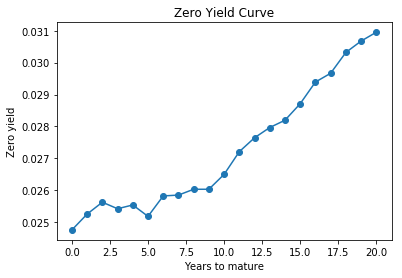

In [221]:
plt.plot(annual_yield, "-o")
plt.xlabel("Years to mature")
plt.ylabel("Zero yield")
plt.title("Zero Yield Curve")
plt.show()

# Question 10 Bootstrap2

In [222]:
bond_bootstrap2 = bond_data[["Maturity", "Coupon", "Price", "N"]].copy()
# select every row except for the four specified securities
bond_bootstrap2 = bond_bootstrap2[bond_bootstrap2["Maturity"] != pd.to_datetime("2/15/2031")]
bond_bootstrap2 = bond_bootstrap2[bond_bootstrap2["Maturity"] != pd.to_datetime("2/15/2036")]
bond_bootstrap2 = bond_bootstrap2[bond_bootstrap2["Maturity"] != pd.to_datetime("2/15/2037")]
bond_bootstrap2 = bond_bootstrap2[bond_bootstrap2["Maturity"] != pd.to_datetime("2/15/2038")]

# reset the index so no index is missing
bond_bootstrap2 = bond_bootstrap2.reset_index(drop=True)
bond_bootstrap2 

,Maturity,Coupon,Price,N
0,2019-08-15,0.08125,102.79,0.5
1,2020-02-15,0.08500,105.88,1.0
2,2020-08-15,0.08750,109.10,1.5
3,2021-02-15,0.07875,110.43,2.0
4,2021-08-15,0.08125,113.57,2.5
5,2022-02-15,0.02500,100.16,3.0
6,2022-08-15,0.07250,115.87,3.5
7,2023-02-15,0.07125,117.60,4.0
8,2023-08-15,0.06250,115.97,4.5
9,2024-02-15,0.02750,101.34,5.0


In [223]:
bond_mat2 = np.zeros((len(bond_bootstrap2), len(bond_bootstrap2)))

for i in range(len(bond_bootstrap2)):

    # i ranges over each bond, represent i th column
    for j in range(i+1):
        # j ranges over each period, represent j th row
        
        # the ji spot of the matrix is the payment of the ith bond on the jth period
        # which is equal to coupon_rate / 2 * face_value, if principle is not repaid at this period
        bond_mat2[j][i] += bond_bootstrap2["Coupon"][i]/2*100
        
        if j == i:
            # if principle is paid back at this period
            bond_mat2[j][i] += 100
pd.DataFrame(bond_mat2)

,0,1,2,3,4,5,6,7,8,9,...,31,32,33,34,35,36,37,38,39,40
0,104.0625,4.25,4.375,3.9375,4.0625,1.25,3.625,3.5625,3.125,1.375,...,1.8125,1.5625,1.25,1.4375,1.25,1.125,1.5,1.375,1.5,1.5
1,0.0000,104.25,4.375,3.9375,4.0625,1.25,3.625,3.5625,3.125,1.375,...,1.8125,1.5625,1.25,1.4375,1.25,1.125,1.5,1.375,1.5,1.5
2,0.0000,0.00,104.375,3.9375,4.0625,1.25,3.625,3.5625,3.125,1.375,...,1.8125,1.5625,1.25,1.4375,1.25,1.125,1.5,1.375,1.5,1.5
3,0.0000,0.00,0.000,103.9375,4.0625,1.25,3.625,3.5625,3.125,1.375,...,1.8125,1.5625,1.25,1.4375,1.25,1.125,1.5,1.375,1.5,1.5
4,0.0000,0.00,0.000,0.0000,104.0625,1.25,3.625,3.5625,3.125,1.375,...,1.8125,1.5625,1.25,1.4375,1.25,1.125,1.5,1.375,1.5,1.5
5,0.0000,0.00,0.000,0.0000,0.0000,101.25,3.625,3.5625,3.125,1.375,...,1.8125,1.5625,1.25,1.4375,1.25,1.125,1.5,1.375,1.5,1.5
6,0.0000,0.00,0.000,0.0000,0.0000,0.00,103.625,3.5625,3.125,1.375,...,1.8125,1.5625,1.25,1.4375,1.25,1.125,1.5,1.375,1.5,1.5
7,0.0000,0.00,0.000,0.0000,0.0000,0.00,0.000,103.5625,3.125,1.375,...,1.8125,1.5625,1.25,1.4375,1.25,1.125,1.5,1.375,1.5,1.5
8,0.0000,0.00,0.000,0.0000,0.0000,0.00,0.000,0.0000,103.125,1.375,...,1.8125,1.5625,1.25,1.4375,1.25,1.125,1.5,1.375,1.5,1.5
9,0.0000,0.00,0.000,0.0000,0.0000,0.00,0.000,0.0000,0.000,101.375,...,1.8125,1.5625,1.25,1.4375,1.25,1.125,1.5,1.375,1.5,1.5


In [224]:
p_vec2 = np.array(bond_bootstrap2["Price"])
q_vec2 = p_vec2 @ la.inv(bond_mat2)
q_vec2

array([0.98777177, 0.97536662, 0.96298222, 0.95161419, 0.93998032,
       0.9297566 , 0.91710895, 0.90628781, 0.89513732, 0.88482606,
       0.87279444, 0.85965009, 0.84767359, 0.83628301, 0.82544705,
       0.81320506, 0.80010894, 0.78926519, 0.77637992, 0.76525649,
       0.75471929, 0.7649108 , 0.80511313, 0.79618776, 0.73923199,
       0.77071537, 0.7046422 , 0.66099052, 0.63074294, 0.63786847,
       0.65067003, 0.64055988, 0.60927311, 0.57098122, 0.57921716,
       0.55332445, 0.5343209 , 0.56068426, 0.53944323, 0.54107647,
       0.53308026])

In [225]:
num_periods2 = np.array(bond_bootstrap2["N"])
annual_yield2 = (1/q_vec2 - 1) / num_periods2
annual_yield2

array([0.02475922, 0.02525551, 0.02562718, 0.02542302, 0.02554082,
       0.02518344, 0.02582371, 0.02585056, 0.02603267, 0.02603313,
       0.02649912, 0.02721067, 0.02764606, 0.02796678, 0.0281953 ,
       0.02871277, 0.02939174, 0.02966681, 0.03031886, 0.03067514,
       0.03095199, 0.0153671 , 0.01180788, 0.01218977, 0.01640722,
       0.01352254, 0.01862933, 0.02229917, 0.024912  , 0.02365506,
       0.02191336, 0.02244537, 0.02514902, 0.02889889, 0.02741389,
       0.02989844, 0.03169216, 0.02798339, 0.0299566 , 0.02924716,
       0.02969119])

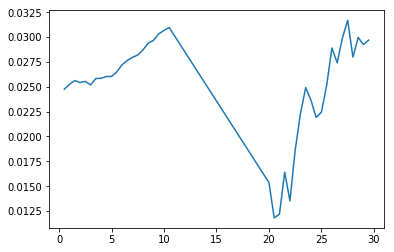

In [216]:
plt.plot(num_periods2, annual_yield2)

what should I do when the qi's for some payments are missing?